nama : kanza az zahrawani <br>
nim  : 09021382227157

## Loading Package


In [2]:
import pandas as pd
import numpy as np
import os 
import re
from geopy.geocoders import Nominatim

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import folium
from folium import plugins

import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update

import warnings

## Loading data

In [3]:
df = pd.read_csv("/home/kanza-laptop/Documents/belajar/python/healthLife/dataset/raw_aug24.csv")
pd

<module 'pandas' from '/home/kanza-laptop/Documents/belajar/python/healthLife/henv/lib/python3.12/site-packages/pandas/__init__.py'>

In [4]:
df

,Unnamed: 0,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building
0,0,"Rp 1,6 Miliar",Cicilan: 5 Jutaan per bulan,"Full furnish, bawa koper aja Rumah di Kota bar...","Kota Baru Parahyangan, Bandung",2,1,1,LT : 72 m²,LB : 50 m²
1,1,Rp 850 Juta,Cicilan: 3 Jutaan per bulan,"Rumah Baru Unfurnished SHM di Sariwangi, Bandung","Sariwangi, Bandung",2,1,1,LT : 70 m²,LB : 80 m²
2,2,Rp 875 Juta,Cicilan: 3 Jutaan per bulan,"New Scandinavian 2lt Kiara Sari Asri, dkt Sams...","Buah Batu, Bandung",3,2,1,LT : 60 m²,LB : 70 m²
3,3,"Rp 1,75 Miliar",Cicilan: 6 Jutaan per bulan,Rumah View Danau di Podomoro Park Bandung,"Podomoro Park Bandung, Bandung",2,3,1,LT : 90 m²,LB : 94 m²
4,4,"Rp 4,9 Miliar",Cicilan: 18 Jutaan per bulan,Rumah Baru Lux Cantik di Singgasana Pradana Lo...,"Singgasana, Bandung",4,4,0,LT : 200 m²,LB : 300 m²
...,...,...,...,...,...,...,...,...,...,...
18957,18957,"Rp 4,95 Miliar",Cicilan: 18 Jutaan per bulan,Rumah di Sayap turangga SHM,"Turangga, Bandung",6,2,2,LT : 191 m²,LB : 160 m²
18958,18958,Rp 28 Miliar,Cicilan: 104 Jutaan per bulan,Dijual Rumah LUX di Jl.Dago Mainroad.,"Dago, Bandung",7,4,4,LT : 748 m²,LB : 900 m²
18959,18959,"Rp 5,5 Miliar",Cicilan: 20 Jutaan per bulan,"Dijual Rumah Siap Huni di Budisari, Setibudi, ...","Setiabudi, Bandung",6,5,2,LT : 325 m²,LB : 300 m²
18960,18960,"Rp 4,5 Miliar",Cicilan: 16 Jutaan per bulan,Rumah 2 Lantai Strategis di Kebon Kopi Cibeure...,"Cibeureum, Bandung",3,4,0,LT : 182 m²,LB : 204 m²


karena ada kolom yang tidak diberinakan dan itu hanya colom penomoran maka saya menghapusnya

In [5]:
df = df.drop(df.columns[0], axis=1)

In [6]:
df

,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building
0,"Rp 1,6 Miliar",Cicilan: 5 Jutaan per bulan,"Full furnish, bawa koper aja Rumah di Kota bar...","Kota Baru Parahyangan, Bandung",2,1,1,LT : 72 m²,LB : 50 m²
1,Rp 850 Juta,Cicilan: 3 Jutaan per bulan,"Rumah Baru Unfurnished SHM di Sariwangi, Bandung","Sariwangi, Bandung",2,1,1,LT : 70 m²,LB : 80 m²
2,Rp 875 Juta,Cicilan: 3 Jutaan per bulan,"New Scandinavian 2lt Kiara Sari Asri, dkt Sams...","Buah Batu, Bandung",3,2,1,LT : 60 m²,LB : 70 m²
3,"Rp 1,75 Miliar",Cicilan: 6 Jutaan per bulan,Rumah View Danau di Podomoro Park Bandung,"Podomoro Park Bandung, Bandung",2,3,1,LT : 90 m²,LB : 94 m²
4,"Rp 4,9 Miliar",Cicilan: 18 Jutaan per bulan,Rumah Baru Lux Cantik di Singgasana Pradana Lo...,"Singgasana, Bandung",4,4,0,LT : 200 m²,LB : 300 m²
...,...,...,...,...,...,...,...,...,...
18957,"Rp 4,95 Miliar",Cicilan: 18 Jutaan per bulan,Rumah di Sayap turangga SHM,"Turangga, Bandung",6,2,2,LT : 191 m²,LB : 160 m²
18958,Rp 28 Miliar,Cicilan: 104 Jutaan per bulan,Dijual Rumah LUX di Jl.Dago Mainroad.,"Dago, Bandung",7,4,4,LT : 748 m²,LB : 900 m²
18959,"Rp 5,5 Miliar",Cicilan: 20 Jutaan per bulan,"Dijual Rumah Siap Huni di Budisari, Setibudi, ...","Setiabudi, Bandung",6,5,2,LT : 325 m²,LB : 300 m²
18960,"Rp 4,5 Miliar",Cicilan: 16 Jutaan per bulan,Rumah 2 Lantai Strategis di Kebon Kopi Cibeure...,"Cibeureum, Bandung",3,4,0,LT : 182 m²,LB : 204 m²


menginput data kecamatan di bandung

In [7]:
df_subdistrict = pd.read_csv("/home/kanza-laptop/Documents/belajar/python/healthLife/dataset/raw_subdistricts.csv").reset_index(drop=True)


In [8]:
df_subdistrict

,Location,City/Regency
0,"Andir, Bandung",Bandung City
1,"Astanaanyar, Bandung",Bandung City
2,"Antapani, Bandung",Bandung City
3,"Arcamanik, Bandung",Bandung City
4,"Babakan Ciparay, Bandung",Bandung City
...,...,...
72,"Padalarang, Bandung",West Bandung Regency
73,"Parongpong, Bandung",West Bandung Regency
74,"Rongga, Bandung",West Bandung Regency
75,"Saguling, Bandung",West Bandung Regency


## Preprocessing Data

In [9]:
print('Info about data:')
print(df.info())
print('\nShape about data:')
print(df.shape)
df.head()


Info about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18962 entries, 0 to 18961
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        18962 non-null  object
 1   Installment  18962 non-null  object
 2   Description  18961 non-null  object
 3   Location     18962 non-null  object
 4   Bedroom      18962 non-null  int64 
 5   Bathroom     18962 non-null  int64 
 6   Carport      18962 non-null  int64 
 7   Land         18962 non-null  object
 8   Building     18962 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.3+ MB
None

Shape about data:
(18962, 9)


,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building
0,"Rp 1,6 Miliar",Cicilan: 5 Jutaan per bulan,"Full furnish, bawa koper aja Rumah di Kota bar...","Kota Baru Parahyangan, Bandung",2,1,1,LT : 72 m²,LB : 50 m²
1,Rp 850 Juta,Cicilan: 3 Jutaan per bulan,"Rumah Baru Unfurnished SHM di Sariwangi, Bandung","Sariwangi, Bandung",2,1,1,LT : 70 m²,LB : 80 m²
2,Rp 875 Juta,Cicilan: 3 Jutaan per bulan,"New Scandinavian 2lt Kiara Sari Asri, dkt Sams...","Buah Batu, Bandung",3,2,1,LT : 60 m²,LB : 70 m²
3,"Rp 1,75 Miliar",Cicilan: 6 Jutaan per bulan,Rumah View Danau di Podomoro Park Bandung,"Podomoro Park Bandung, Bandung",2,3,1,LT : 90 m²,LB : 94 m²
4,"Rp 4,9 Miliar",Cicilan: 18 Jutaan per bulan,Rumah Baru Lux Cantik di Singgasana Pradana Lo...,"Singgasana, Bandung",4,4,0,LT : 200 m²,LB : 300 m²


In [10]:
print('Info about data:')
print(df_subdistrict.info())
print('\nShape about data:')
print(df_subdistrict.shape)
df_subdistrict.head()


Info about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      77 non-null     object
 1   City/Regency  77 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
None

Shape about data:
(77, 2)


,Location,City/Regency
0,"Andir, Bandung",Bandung City
1,"Astanaanyar, Bandung",Bandung City
2,"Antapani, Bandung",Bandung City
3,"Arcamanik, Bandung",Bandung City
4,"Babakan Ciparay, Bandung",Bandung City


dengan melihat data-data ini kita dapat melihat bahwa terdapat perbedaan format kepenulisan nama-nama lokasi ada yang menulisnya dengan nama desa, kecamatan dan kabupaten. jadi kita perlu menetapkan standar penempatan lokasi yang setingkat. maka dari itu. memerlukan 2 perubahan yaitu penghapusan dan perubahan 


### Menghapus Data
data yang dihapus hanya data yang bias seperti lokasi yang mengandung makna seperti "Bandung barat" yang seharunya berkecamatan di bandung itu sendiri, "Cimahi" yang saharusnya nama kota di sebelah bandung, dan "bandung kota" yang menunjuk ke pusat kota itu sendiri sehingga membuat makna yang ambigu

In [11]:
# mencari nama lokasi yang tidak sesuai
df_locate = df['Location'].str.contains("Bandung Barat|Bandung Kota|Bandung Selatan|Bandung Timur|Bandung Utara|Cibeunying, Bandung|Cimahi|Jatinangor|No Data|Bojongloa, Bandung")
# mengambil alamat indexnya
df_locate_index = df[df_locate].index
# menhapus barisnya berdasarkan kolomnya
df = df.drop(df_locate_index)

In [12]:
df.shape

(17720, 9)

### menyesuaikan data
penyesuaian lokasi daerah diubah berdasarkan wilayah yang telah ditetapkan. yang terdapat di website wikipedia bandung

In [13]:
replacement = {
    r"Dadali, Bandung|Gardu Jati, Bandung|Garuda, Bandung" : "Andir, Bandung", r"Muara, Bandung|Otista, Bandung|Tegalega, Bandung" : "Astanaanyar, Bandung", r"Diponegoro, Bandung|Riau, Bandung|Supratman, Bandung|Wastukencana, Bandung" : "Bandung Wetan, Bandung",
    r"Babakanciparay, Bandung|Sukahaji, Bandung" : "Babakan Ciparay, Bandung", "Rancamanyar, Bandung" : "Baleendah, Bandung", r"Caringin, Bandung|Cigondewah, Bandung|Cijerah, Bandung|Holis Cigondewah, Bandung|Sudirman, Bandung" : "Bandung Kulon, Bandung", 
    r"Gatot Subroto, Bandung|Laswi, Bandung" : "Batununggal, Bandung", r"Kopo, Bandung|Pasir Koja, Bandung|Peta, Bandung" : "Bojongloa Kaler, Bandung", "Cibaduyut, Bandung|Leuwi Panjang, Bandung|Mekar Wangi, Bandung|Singgasana, Bandung" : "Bojongloa Kidul, Bandung", 
    r"Podomoro Park Bandung, Bandung|Terusan Buah Batu, Bandung" : "Bojongsoang, Bandung", r"Ciwastra, Bandung|Margacinta, Bandung|Soekarno Hatta, Bandung" : "Buah Batu, Bandung", r"Cigadung, Bandung|Suci, Bandung|Sukaluyu, Bandung|Surapati, Bandung" : "Cibeunying Kaler, Bandung", 
    r"Cicadas, Bandung|Cikutra, Bandung|Padasuka, Bandung" : "Cibeunying Kidul, Bandung", r"Gunung Batu, Bandung|Kebon Kawung, Bandung|Pajajaran, Bandung|Pasir Kaliki, Bandung" : "Cicendo, Bandung", r"Ciumbuleuit, Bandung|Hegarmanah, Bandung|Setiabudi, Bandung" : "Cidadap, Bandung", 
    "Awiligar, Bandung" : "Cimenyan, Bandung", "Pinus, Bandung" : "Cinambo, Bandung", "Cipaganti, Bandung|Dago Pakar, Bandung|Dago, Bandung|Sayap Dago, Bandung|Tubagus Ismail, Bandung|Cihampelas, Bandung" : "Coblong, Bandung", "Summarecon Bandung, Bandung|Gede Bage, Bandung" : "Gedebage, Bandung", 
    "Cibeureum, Bandung" : "Kertasari, Bandung", "Cicaheum, Bandung" : "Kiaracondong, Bandung", r"Cibogo, Bandung" : "Lembang, Bandung", r"Asia Afrika, Bandung|Burangrang, Bandung|Cijagra, Bandung|Pelajar Pejuang, Bandung|Talaga Bodas, Bandung|Turangga, Bandung" : "Lengkong, Bandung", 
    r"Cimindi, Bandung|Taman Kopo Indah, Bandung" : "Margaasih, Bandung", "Kopo Permai, Bandung" : "Margahayu, Bandung", "Kota Baru Parahyangan, Bandung" : "Padalarang, Bandung", r"Cihanjuang, Bandung|Sariwangi, Bandung" : "Parongpong, Bandung", "Cipaku, Bandung" : "Paseh, Bandung", 
    "Derwati, Bandung" : "Rancasari, Bandung", r"BKR, Bandung|Ciateul, Bandung|Moch Toha, Bandung|Pasir Luyu, Bandung|Pungkur, Bandung" : "Regol, Bandung", r"Cipedes, Bandung|Pasteur, Bandung|Setra Indah, Bandung|Surya Sumantri, Bandung" : "Sukajadi, Bandung", 
    r"Geger Kalong, Bandung|Pondok Hijau, Bandung|Sarijadi, Bandung|Setra Duta, Bandung|Setra Murni, Bandung|Setra Sari, Bandung" : "Sukasari, Bandung", r"Braga, Bandung|Kosambi, Bandung|Veteran, Bandung|Sumurbandung, Bandung" : "Sumur Bandung, Bandung"
}

df["Location"] = df["Location"].replace(replacement, regex=True)
df['Location'] = df['Location'].str.replace('\xa0', ' ')

In [14]:
df

,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building
0,"Rp 1,6 Miliar",Cicilan: 5 Jutaan per bulan,"Full furnish, bawa koper aja Rumah di Kota bar...","Padalarang, Bandung",2,1,1,LT : 72 m²,LB : 50 m²
1,Rp 850 Juta,Cicilan: 3 Jutaan per bulan,"Rumah Baru Unfurnished SHM di Sariwangi, Bandung","Parongpong, Bandung",2,1,1,LT : 70 m²,LB : 80 m²
2,Rp 875 Juta,Cicilan: 3 Jutaan per bulan,"New Scandinavian 2lt Kiara Sari Asri, dkt Sams...","Buah Batu, Bandung",3,2,1,LT : 60 m²,LB : 70 m²
3,"Rp 1,75 Miliar",Cicilan: 6 Jutaan per bulan,Rumah View Danau di Podomoro Park Bandung,"Bojongsoang, Bandung",2,3,1,LT : 90 m²,LB : 94 m²
4,"Rp 4,9 Miliar",Cicilan: 18 Jutaan per bulan,Rumah Baru Lux Cantik di Singgasana Pradana Lo...,"Bojongloa Kidul, Bandung",4,4,0,LT : 200 m²,LB : 300 m²
...,...,...,...,...,...,...,...,...,...
18957,"Rp 4,95 Miliar",Cicilan: 18 Jutaan per bulan,Rumah di Sayap turangga SHM,"Lengkong, Bandung",6,2,2,LT : 191 m²,LB : 160 m²
18958,Rp 28 Miliar,Cicilan: 104 Jutaan per bulan,Dijual Rumah LUX di Jl.Dago Mainroad.,"Coblong, Bandung",7,4,4,LT : 748 m²,LB : 900 m²
18959,"Rp 5,5 Miliar",Cicilan: 20 Jutaan per bulan,"Dijual Rumah Siap Huni di Budisari, Setibudi, ...","Cidadap, Bandung",6,5,2,LT : 325 m²,LB : 300 m²
18960,"Rp 4,5 Miliar",Cicilan: 16 Jutaan per bulan,Rumah 2 Lantai Strategis di Kebon Kopi Cibeure...,"Kertasari, Bandung",3,4,0,LT : 182 m²,LB : 204 m²


setelah itu kita perlu mencari logitude dan lattitude dari masing-masing lokasi yang bisa didapat dengan berbagai cara. namun kali ini saya menggunakan nominatim geocoder

In [15]:
#Create empty dataframe, list and define location
df_latlong = pd.DataFrame()
data = df_subdistrict["Location"].unique()
latitude = []
longitude = []

#To initialize Nominatim geocoder
geolocator = Nominatim(user_agent="bandung_geocoder")

for loc in data:
    try:
        location = geolocator.geocode(loc)
        if location is None:
            latitude.append(None)
            longitude.append(None)
        else:
            latitude.append(location.latitude)
            longitude.append(location.longitude)
    except Exception as e:
        print(f"Error geocoding {loc}: {e}")
        latitude.append(None)
        longitude.append(None)

#To add new columns to DataFrame
df_latlong["Location"] = data
df_latlong["Latitude"] = latitude
df_latlong["Longitude"] = longitude

In [16]:
df_latlong.sort_values(["Latitude"], ascending=[True])


,Location,Latitude,Longitude
46,"Kertasari, Bandung",-7.230321,107.656360
54,"Pangalengan, Bandung",-7.164045,107.603020
44,"Ibun, Bandung",-7.132164,107.759650
57,"Rancabali, Bandung",-7.117948,107.434849
39,"Cimaung, Bandung",-7.103982,107.559044
...,...,...,...
73,"Parongpong, Bandung",-6.803228,107.581804
66,"Cipeundeuy, Bandung",-6.752978,107.369111
63,"Cikalong Wetan, Bandung",-6.734761,107.437824
68,"Cisarua, Bandung",-6.659624,106.913431


karen paseh, bandung tidak ditemukan maka kita meninput secara manual berdasarkan data dari google

In [17]:
index_paseh = df_latlong[df_latlong["Location"] == "Paseh, Bandung"].index
df_latlong.loc[index_paseh, "Latitude"] = -7.0498
df_latlong.loc[index_paseh, "Longitude"] = 107.7731

index_Cangkuang = df_latlong[df_latlong["Location"] == "Cangkuang, Bandung"].index
df_latlong.loc[index_Cangkuang, "Latitude"] = -7.038256
df_latlong.loc[index_Cangkuang ,"Longitude"] = 107.576428



kita bisa menggabunngkan data df_latlong ke dataset kedua supaya memudahkan

In [18]:
df_subdistrict = df_subdistrict.merge(df_latlong, on="Location")

In [19]:
df_subdistrict

,Location,City/Regency,Latitude,Longitude
0,"Andir, Bandung",Bandung City,-6.906144,107.571332
1,"Astanaanyar, Bandung",Bandung City,-6.938790,107.602870
2,"Antapani, Bandung",Bandung City,-6.917856,107.659881
3,"Arcamanik, Bandung",Bandung City,-6.921447,107.677016
4,"Babakan Ciparay, Bandung",Bandung City,-6.940297,107.575683
...,...,...,...,...
72,"Padalarang, Bandung",West Bandung Regency,-6.982312,107.804019
73,"Parongpong, Bandung",West Bandung Regency,-6.803228,107.581804
74,"Rongga, Bandung",West Bandung Regency,-6.961289,107.282311
75,"Saguling, Bandung",West Bandung Regency,-6.925818,107.408612


## Melihat peta bandung dan kecamatan nya 



In [20]:
df_subdistrict[df_subdistrict.isna().any(axis=1)]

,Location,City/Regency,Latitude,Longitude


In [21]:
# Latitude and Longitude for Bandung (replace with your desired center coordinates)
Latitude = -6.905977
Longitude = 107.613144

# Color dictionary for City/Regency
colors = {
    "Bandung City": "blue",
    "Bandung Regency": "green",
    "West Bandung Regency": "red"
}

# Use folium for map visualization
bandung_map = folium.Map(location=[Latitude, Longitude], zoom_start=12)

house = plugins.MarkerCluster().add_to(bandung_map)

for lat, lng, label, city_regency in zip(df_subdistrict["Latitude"], df_subdistrict["Longitude"], df_subdistrict["Location"], df_subdistrict["City/Regency"]):
    # Get color based on City/Regency (handle potential errors)
    color = colors.get(city_regency, 'gray')  # Use 'gray' as default if not found

    folium.Marker(
        location=[lat, lng],
        popup=label,
        icon=folium.Icon(color=color)  # Set marker color based on city_regency
    ).add_to(house)

# Display map
bandung_map

setelah melihat peta ini. ternyata masih ada koordinat yang kurang tepat pada data kita dan harus di ubah.

### menyesuaikan koordinat data 

In [22]:
#sukajadi, Bandung
index_Sukajadi = df_subdistrict[df_subdistrict["Location"] == "Sukajadi, Bandung"].index
df_subdistrict.loc[index_Sukajadi, "Latitude"] = -6.8923
df_subdistrict.loc[index_Sukajadi, "Longitude"] = 107.5909

#Pameungpeuk, Bandung
index_Pameungpeuk = df_subdistrict[df_subdistrict["Location"] == "Pameungpeuk, Bandung"].index
df_subdistrict.loc[index_Pameungpeuk, "Latitude"] = -7.0243
df_subdistrict.loc[index_Pameungpeuk, "Longitude"] = 107.5944

#Sukasari, Bandung
index_Sukasari = df_subdistrict[df_subdistrict["Location"] == "Sukasari, Bandung"].index
df_subdistrict.loc[index_Sukasari, "Latitude"] = -6.8630
df_subdistrict.loc[index_Sukasari, "Longitude"] = 107.5881

#Cihampelas, Bandung
index_Cihampelas = df_subdistrict[df_subdistrict["Location"] == "Cihampelas, Bandung"].index
df_subdistrict.loc[index_Cihampelas, "Latitude"] = -6.9362
df_subdistrict.loc[index_Cihampelas, "Longitude"] = 107.5046

#padalarang, Bandung
index_Padalarang = df_subdistrict[df_subdistrict["Location"] == "Padalarang, Bandung"].index
df_subdistrict.loc[index_Padalarang, "Latitude"] = -6.8436
df_subdistrict.loc[index_Padalarang, "Longitude"] = 107.4784

#Cisarua, Bandung
index_Cisarua = df_subdistrict[df_subdistrict["Location"] == "Cisarua, Bandung"].index
df_subdistrict.loc[index_Cisarua, "Latitude"] = -6.7973
df_subdistrict.loc[index_Cisarua, "Longitude"] = 107.5734

tahap pencarian lattitude dan logitude telah dilakukan, kemudian kita bisa menggabungkannya ke dataset 1 berdasarkan penyesusaian lokasi, dan kita menghapus kata "bandung" dari setiap kolom lokasi sehingga tidak menhasilkan bisa pada analisis ataupun visualisasi nanti

In [23]:
df = df.merge(df_subdistrict, on='Location')

df['Location'] = df['Location'].str.replace(', Bandung', '')

In [24]:
df

,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building,City/Regency,Latitude,Longitude
0,"Rp 1,6 Miliar",Cicilan: 5 Jutaan per bulan,"Full furnish, bawa koper aja Rumah di Kota bar...",Padalarang,2,1,1,LT : 72 m²,LB : 50 m²,West Bandung Regency,-6.843600,107.478400
1,Rp 850 Juta,Cicilan: 3 Jutaan per bulan,"Rumah Baru Unfurnished SHM di Sariwangi, Bandung",Parongpong,2,1,1,LT : 70 m²,LB : 80 m²,West Bandung Regency,-6.803228,107.581804
2,Rp 875 Juta,Cicilan: 3 Jutaan per bulan,"New Scandinavian 2lt Kiara Sari Asri, dkt Sams...",Buah Batu,3,2,1,LT : 60 m²,LB : 70 m²,Bandung City,-6.965549,107.637926
3,"Rp 1,75 Miliar",Cicilan: 6 Jutaan per bulan,Rumah View Danau di Podomoro Park Bandung,Bojongsoang,2,3,1,LT : 90 m²,LB : 94 m²,Bandung Regency,-6.993945,107.643700
4,"Rp 4,9 Miliar",Cicilan: 18 Jutaan per bulan,Rumah Baru Lux Cantik di Singgasana Pradana Lo...,Bojongloa Kidul,4,4,0,LT : 200 m²,LB : 300 m²,Bandung City,-6.947036,107.596271
...,...,...,...,...,...,...,...,...,...,...,...,...
17715,"Rp 4,95 Miliar",Cicilan: 18 Jutaan per bulan,Rumah di Sayap turangga SHM,Lengkong,6,2,2,LT : 191 m²,LB : 160 m²,Bandung City,-6.934348,107.626219
17716,Rp 28 Miliar,Cicilan: 104 Jutaan per bulan,Dijual Rumah LUX di Jl.Dago Mainroad.,Coblong,7,4,4,LT : 748 m²,LB : 900 m²,Bandung City,-6.880933,107.613921
17717,"Rp 5,5 Miliar",Cicilan: 20 Jutaan per bulan,"Dijual Rumah Siap Huni di Budisari, Setibudi, ...",Cidadap,6,5,2,LT : 325 m²,LB : 300 m²,Bandung City,-6.862797,107.609356
17718,"Rp 4,5 Miliar",Cicilan: 16 Jutaan per bulan,Rumah 2 Lantai Strategis di Kebon Kopi Cibeure...,Kertasari,3,4,0,LT : 182 m²,LB : 204 m²,Bandung Regency,-7.230321,107.656360


In [25]:
df.isnull()

,Price,Installment,Description,Location,Bedroom,Bathroom,Carport,Land,Building,City/Regency,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
17715,False,False,False,False,False,False,False,False,False,False,False,False
17716,False,False,False,False,False,False,False,False,False,False,False,False
17717,False,False,False,False,False,False,False,False,False,False,False,False
17718,False,False,False,False,False,False,False,False,False,False,False,False


sepertinya tidak ada nilai null, sehingga kita lanjut ke tahap selanjutnya

## Wrangling Data

ada bbrp baris yang masih menggunakan katerogikal data sehingga kita perlu mengubahnya ke numerikal untuk memudahkan proses analisis. kemudian kita bisa menhapus baris table yang tidak diperlukan. menghapus data yang duplikat. serta menangani nilai yang hilang pada dataset

In [26]:
#To remove the duplicates
duplicate_row = df[df.duplicated()]
df.drop_duplicates(inplace=True)
print(f"{len(duplicate_row)} rows have been removed")

#To drop unnecessary columns
df = df.drop(["Installment", "Description"], axis=1)

#To correct and change data type Price column
df["Price"] = df["Price"].astype(str)
df["Price"] = df["Price"].str.replace('Rp','').str.replace(',','.')

def price_to_num(x):
    if type(x) == float or type(x) == int:
        return x
    if 'Juta' in x:
        if len(x) > 1:
            return float(x.replace('Juta', '')) * 1000000
        return 1000000.0
    if 'Miliar' in x:
        if len(x) > 1:
            return float(x.replace('Miliar', '')) * 1000000000
        return 1000000000.0
    return 0.0
df["Price"] = df["Price"].apply(price_to_num)

#To correct and change data type Land and Building column
pattern = r"[^\d]+"
df["Land"] = df["Land"].astype(str).str.replace(pattern, "", regex=True).replace(np.nan, 0)
df["Building"] = df["Building"].astype(str).str.replace(pattern, "", regex=True).replace(np.nan, 0)
area = ["Land", "Building"]
df[area] = df[area].apply(pd.to_numeric, errors='ignore')

817 rows have been removed


/tmp/ipykernel_5486/1112006880.py:32: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[area] = df[area].apply(pd.to_numeric, errors='ignore')


##  mencari nilai null

In [27]:
missing_value = df.isnull()

for col in missing_value.columns.values.tolist():
    print(missing_value[col].value_counts())
    print('')

Price
False    16903
Name: count, dtype: int64

Location
False    16903
Name: count, dtype: int64

Bedroom
False    16903
Name: count, dtype: int64

Bathroom
False    16903
Name: count, dtype: int64

Carport
False    16903
Name: count, dtype: int64

Land
False    16903
Name: count, dtype: int64

Building
False    16903
Name: count, dtype: int64

City/Regency
False    16903
Name: count, dtype: int64

Latitude
False    16903
Name: count, dtype: int64

Longitude
False    16903
Name: count, dtype: int64



selanjutnya kita akan menhapus data yang memiliki kriteria sebagai berikut:
1. rumah tanpa kamartidur dan kamar mandi
2. rumah yang luasnya kurang dari 36 m2
3. rumah yang ukuran bangunan dan luas tanahnya tidak sesuai

In [28]:
df = df[(df['Bathroom'] != 0) & (df['Bedroom'] != 0)]

df = df[(df['Building'] > 36) & (df['Land'] > 36)]


In [29]:
# menampilkan data bangunan dari yang terbesar
df_nonsense = df.sort_values("Building", ascending=False)
df_nonsense.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,City/Regency,Latitude,Longitude
14639,1.800000e+09,Antapani,5,4,1,200,1502012,Bandung City,-6.917856,107.659881
7750,3.600000e+09,Bandung Kulon,4,3,2,30000,40000,Bandung City,-6.931934,107.555053
9372,3.200000e+09,Regol,4,4,1,23900,32000,Bandung City,-6.939713,107.613797
10410,3.150000e+09,Antapani,3,2,3,25600,23700,Bandung City,-6.917856,107.659881
10516,1.900000e+09,Regol,3,2,2,10800,14000,Bandung City,-6.939713,107.613797


In [30]:
df_nonsense = df.sort_values("Land", ascending=False)
df_nonsense.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,City/Regency,Latitude,Longitude
9472,4.900000e+09,Sukajadi,5,3,0,4900000000,397,Bandung City,-6.892300,107.590900
8619,1.800000e+10,Pangalengan,4,5,5,35000,250,Bandung Regency,-7.164045,107.603020
7750,3.600000e+09,Bandung Kulon,4,3,2,30000,40000,Bandung City,-6.931934,107.555053
12000,4.700000e+09,Cibeunying Kidul,7,7,3,25744,420,Bandung City,-6.898512,107.650077
10410,3.150000e+09,Antapani,3,2,3,25600,23700,Bandung City,-6.917856,107.659881


dari data diatas dapat kita lihat ada ukurang yang tidak sesuai dengan luas tanahnya. baik itu dari bangunan ataupun dari ukuran tanahnya. maka kita hapus

In [31]:
df = df.drop([14639, 9472], axis=0)


## mengecek outlier

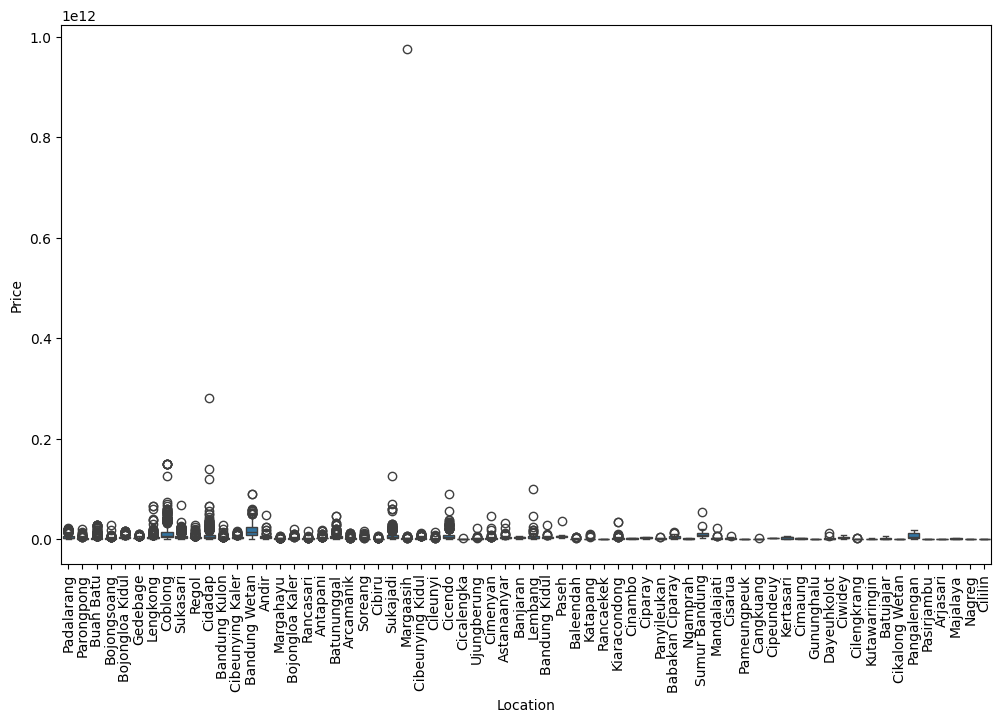

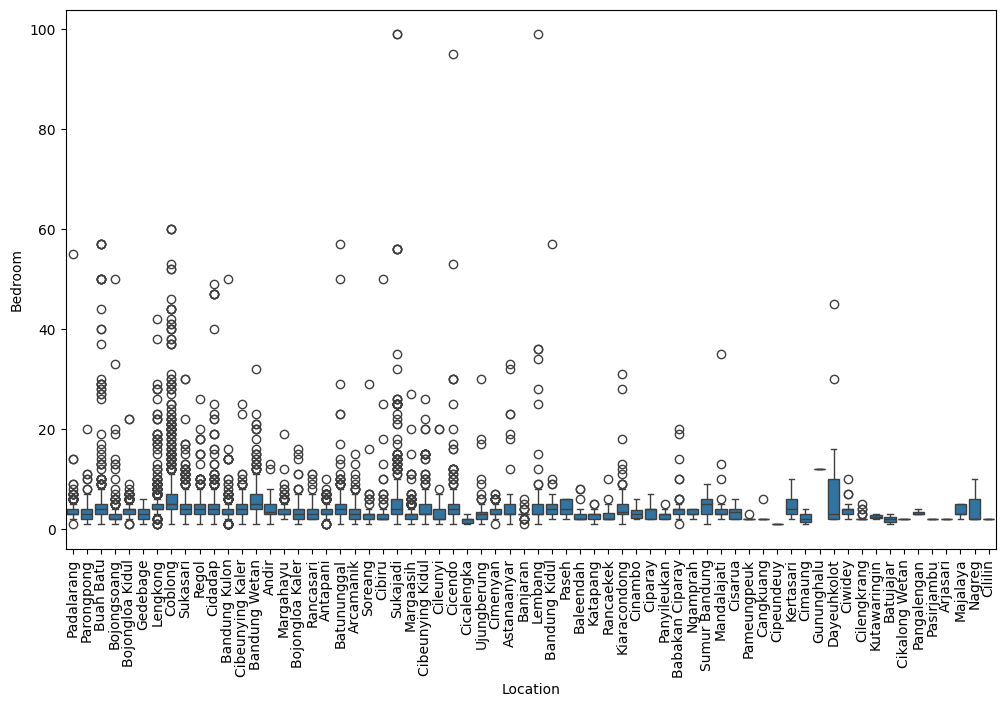

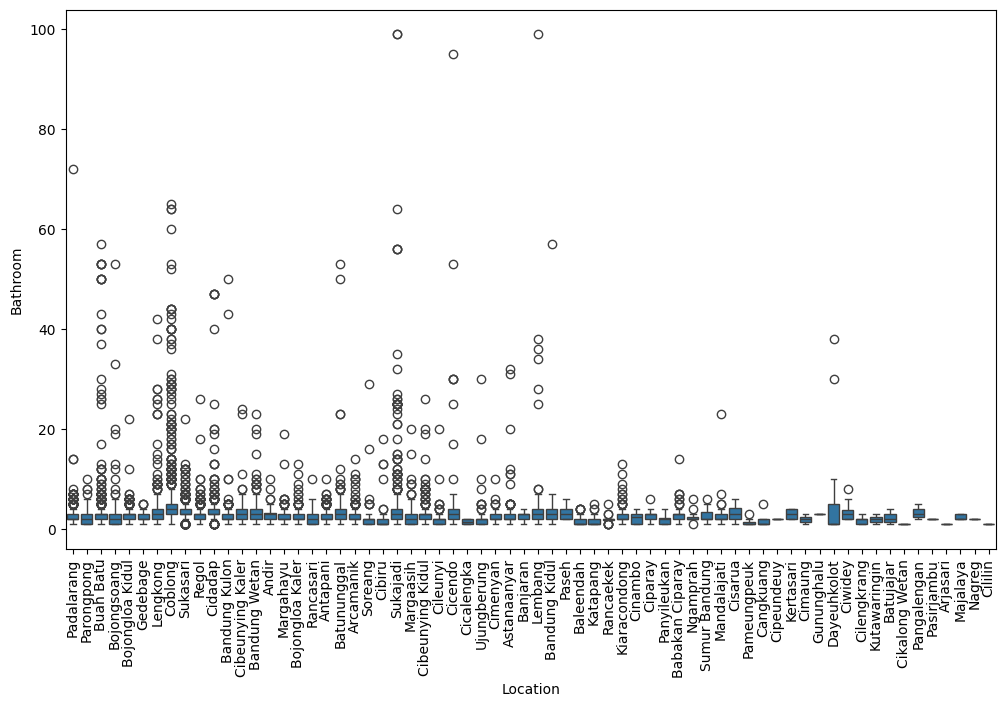

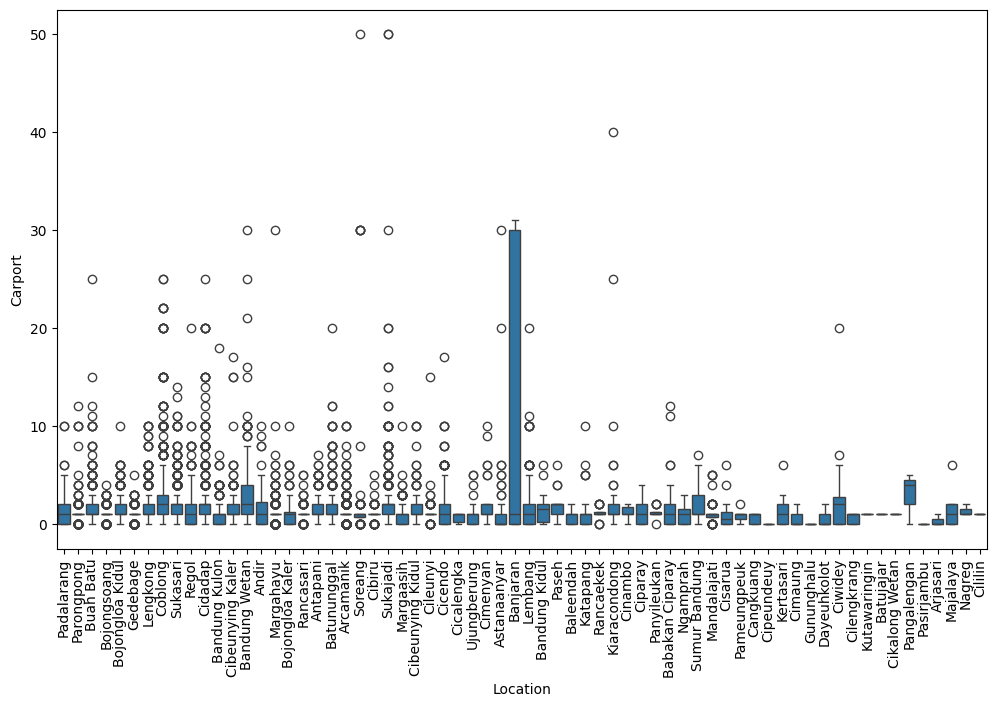

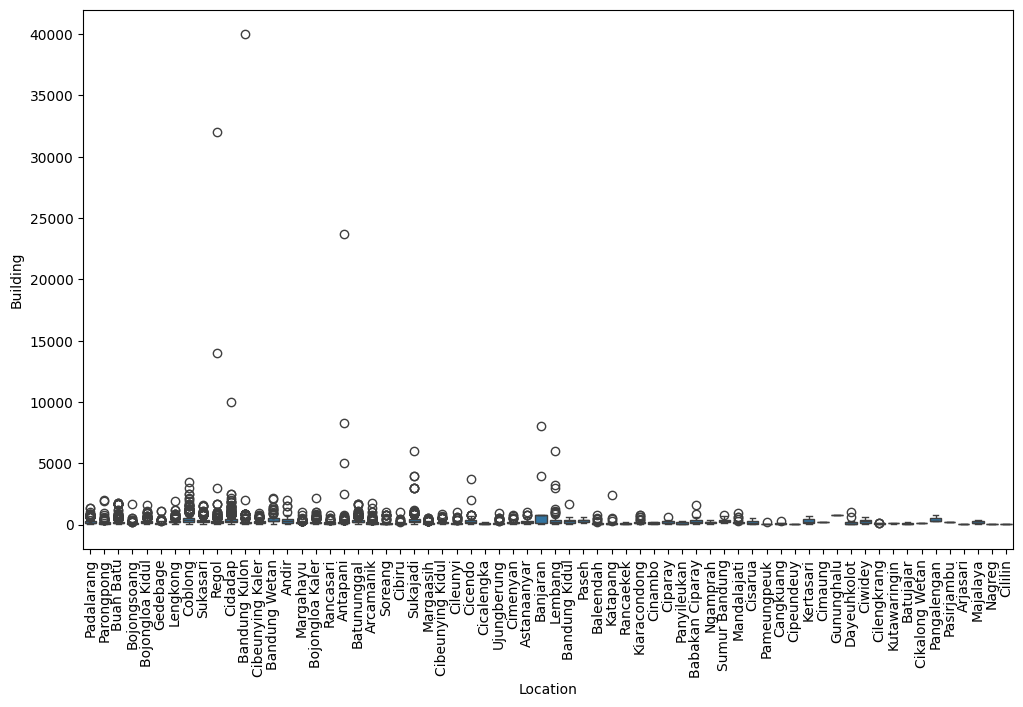

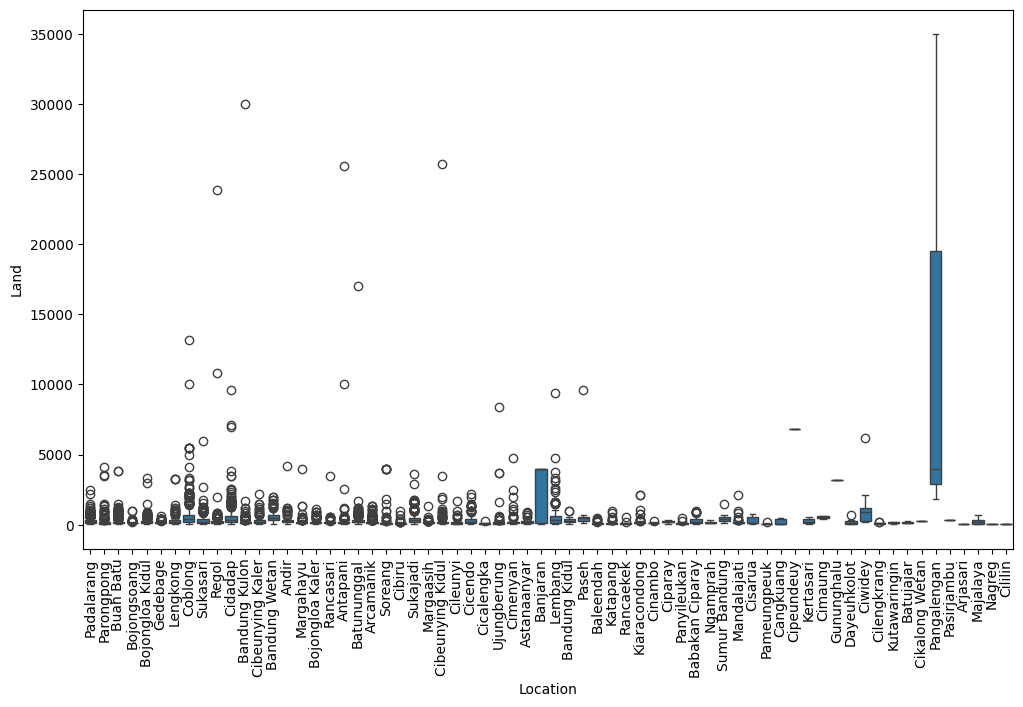

In [32]:
list = ["Price", "Bedroom", "Bathroom", "Carport", "Building", "Land"]

for i in df[list]:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=df["Location"], y=i, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [33]:
list = ["Price", "Bedroom", "Bathroom", "Carport", "Building", "Land"]
index_outlier = []

for i in list:
    quartile_1 = df[i].quantile(0.25)
    quartile_3 = df[i].quantile(0.75)
    IQR = quartile_3 - quartile_1
    print("For column",i)
    print("The value of Inter Quartile Range is", IQR)
    up_bound = quartile_3 + IQR*1.5
    print("Upper bound is", up_bound)
    lo_bound = quartile_1 - IQR*1.5
    print("Lower bound is", lo_bound)
    print(" ")
    index_outlier.extend(df[df[i] > up_bound].index.tolist())
    
df_clean = df.drop(index_outlier)


For column Price
The value of Inter Quartile Range is 3150000000.0
Upper bound is 9225000000.0
Lower bound is -3375000000.0
 
For column Bedroom
The value of Inter Quartile Range is 2.0
Upper bound is 8.0
Lower bound is 0.0
 
For column Bathroom
The value of Inter Quartile Range is 1.0
Upper bound is 4.5
Lower bound is 0.5
 
For column Carport
The value of Inter Quartile Range is 1.0
Upper bound is 3.5
Lower bound is -0.5
 
For column Building
The value of Inter Quartile Range is 192.0
Upper bound is 588.0
Lower bound is -180.0
 
For column Land
The value of Inter Quartile Range is 188.0
Upper bound is 582.0
Lower bound is -170.0
 


In [34]:
df_clean

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1,1,72,50,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1,1,70,80,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2,1,60,70,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3,1,90,94,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4,0,200,300,Bandung City,-6.947036,107.596271
...,...,...,...,...,...,...,...,...,...,...
17713,1.850000e+09,Lengkong,5,3,2,140,150,Bandung City,-6.934348,107.626219
17714,1.870000e+09,Parongpong,4,2,0,207,90,West Bandung Regency,-6.803228,107.581804
17715,4.950000e+09,Lengkong,6,2,2,191,160,Bandung City,-6.934348,107.626219
17718,4.500000e+09,Kertasari,3,4,0,182,204,Bandung Regency,-7.230321,107.656360


# Menganalisis Data

berdasarkan data ini ada bbrp  analisis yang akan kita lakukan yaitu.
1. bandung terdiri dari bbrp kabupaten. temukan nilai min, max dan median dari setiap harga rumah dari masing-masing kabupaten
2. cari harga rumah yang memiliki fitur spesifik dari ukuran keluarga kecil dan keluarga yang besar pada setiap distrik
3. visualisasikan data jadi pembeli bisa melihat perbedan fitur dan harganya

## 1. mencari nlai min max dan harga rumah setiap distrik 

In [35]:
# mencari nama-nama lokasi di setiap table
loc = df_clean['Location'].unique()
df_location = {}

#  membuat dictionary yang akan menyimpan hasilnya nanti

# melakukan perulangan untuk mencari nilai min-max setiap kabupaten

for i in loc:
    df_loop = df_clean[df_clean['Location']== i ] # code ini akan membunpulkan seluruh baris yang sama kabupaten saja
    df_location[i] = df_loop['Price'].describe() #kemudian mencari hasil rata-rata,std,mean dll berdasarkan kolom price di datasett df_loop

df_location = pd.DataFrame(df_location).T #mengubah df_location darii dictionary menjadi dataframe 
df_location.reset_index(inplace=True)

In [36]:
df_location

,index,count,mean,std,min,25%,50%,75%,max
0,Padalarang,1049.0,3.528673e+09,1.940550e+09,350000000.0,2.300000e+09,2.850000e+09,4.200000e+09,9.100000e+09
1,Parongpong,260.0,1.399815e+09,1.034110e+09,375000000.0,7.500000e+08,9.700000e+08,1.700000e+09,7.850000e+09
2,Buah Batu,1126.0,1.766745e+09,1.114563e+09,60000000.0,9.912500e+08,1.500000e+09,2.300000e+09,9.000000e+09
3,Bojongsoang,335.0,1.640415e+09,1.297309e+09,70000000.0,7.500000e+08,1.400000e+09,1.945000e+09,7.750000e+09
4,Bojongloa Kidul,678.0,2.951245e+09,1.680840e+09,55000000.0,1.512500e+09,2.980000e+09,4.300000e+09,9.000000e+09
...,...,...,...,...,...,...,...,...,...
58,Pasirjambu,1.0,8.000000e+08,NaN,800000000.0,8.000000e+08,8.000000e+08,8.000000e+08,8.000000e+08
59,Arjasari,3.0,3.183333e+08,5.773503e+07,285000000.0,2.850000e+08,2.850000e+08,3.350000e+08,3.850000e+08
60,Majalaya,4.0,9.362500e+08,6.116286e+08,395000000.0,5.862500e+08,7.750000e+08,1.125000e+09,1.800000e+09
61,Nagreg,2.0,4.180000e+08,0.000000e+00,418000000.0,4.180000e+08,4.180000e+08,4.180000e+08,4.180000e+08


In [37]:
df_location = df_location[['index', '50%', 'min', 'max']] # hanya mengambil data tersebut
df_location.columns = ['Location', 'median', 'min', 'max']
df_location

,Location,median,min,max
0,Padalarang,2.850000e+09,350000000.0,9.100000e+09
1,Parongpong,9.700000e+08,375000000.0,7.850000e+09
2,Buah Batu,1.500000e+09,60000000.0,9.000000e+09
3,Bojongsoang,1.400000e+09,70000000.0,7.750000e+09
4,Bojongloa Kidul,2.980000e+09,55000000.0,9.000000e+09
...,...,...,...,...
58,Pasirjambu,8.000000e+08,800000000.0,8.000000e+08
59,Arjasari,2.850000e+08,285000000.0,3.850000e+08
60,Majalaya,7.750000e+08,395000000.0,1.800000e+09
61,Nagreg,4.180000e+08,418000000.0,4.180000e+08


### 2. cari harga rumah yang memiliki fitur spesifik dari ukuran keluarga kecil dan keluarga yang besar pada setiap distrik

kriteria:
keluarga kecil : rumah dengan 2 kamar tidur dan 1 kamar mandi
keluarga besar : rumah dengan 3 kamar tidur dan 1 kamar mandi



## keluarga kecil

In [38]:
# inisialisasi variabel 
loc = df_clean['Location'].unique()
df_2b1t = {}

for i in loc:
    df_loop = df_clean[(df_clean['Location'] == i) & (df_clean['Bathroom'] == 1) & (df_clean['Bedroom'] == 2)]  #mengumpulkan data yang jika lokasi sama dengan i, bathroomnya 1 dan bedroomny 2
    df_2b1t[i] = df_loop['Price'].describe()

df_2b1t = pd.DataFrame(df_2b1t).T #mengubahnya menjadi dataframe
df_2b1t.reset_index(inplace=True)

df_2b1t = df_2b1t[['index', '50%', 'min', 'max']]
df_2b1t.columns = ["Location", "Median", "Min", "Max"]
df_2b1t = df_2b1t.dropna(subset=["Median", "Min", "Max"])

df_2b1t


,Location,Median,Min,Max
0,Padalarang,1.700000e+09,478000000.0,4.800000e+09
1,Parongpong,6.500000e+08,375000000.0,3.180000e+09
2,Buah Batu,6.800000e+08,175000000.0,2.900000e+09
3,Bojongsoang,7.000000e+08,70000000.0,7.750000e+09
4,Bojongloa Kidul,7.500000e+08,236000000.0,2.600000e+09
5,Gedebage,7.245000e+08,265000000.0,2.800000e+09
6,Lengkong,2.600000e+08,175000000.0,3.200000e+09
7,Regol,1.000000e+09,482000000.0,3.000000e+09
8,Bandung Kulon,9.995000e+08,575000000.0,2.320000e+09
9,Cibeunying Kaler,1.292500e+09,785000000.0,1.800000e+09


### keluarga besar

In [39]:
loc = df_clean["Location"].unique()
df_3b2t = {}

for i in loc:
    df_loop = df_clean[(df_clean["Location"] == i) & (df_clean["Bedroom"] == 3) & (df_clean["Bathroom"] == 2)]
    df_3b2t[i] = df_loop["Price"].describe()

df_3b2t = pd.DataFrame(df_3b2t).T
df_3b2t.reset_index(inplace=True)

df_3b2t = df_3b2t[["index", "50%", "min", "max"]]
df_3b2t.columns = ["Location", "Median", "Min", "Max"]
df_3b2t = df_3b2t.dropna(subset=["Median", "Min", "Max"])
df_3b2t

,Location,Median,Min,Max
0,Padalarang,2.700000e+09,3.500000e+08,7.200000e+09
1,Parongpong,1.175000e+09,5.000000e+08,3.500000e+09
2,Buah Batu,1.200000e+09,4.500000e+08,4.300000e+09
3,Bojongsoang,1.000000e+09,5.500000e+08,3.750000e+09
4,Bojongloa Kidul,2.500000e+09,5.500000e+07,7.000000e+09
5,Gedebage,1.900000e+09,5.750000e+08,4.500000e+09
6,Lengkong,2.575000e+09,4.500000e+08,9.000000e+09
7,Regol,1.900000e+09,7.500000e+08,5.000000e+09
8,Bandung Kulon,1.500000e+09,5.000000e+08,3.290000e+09
9,Cibeunying Kaler,2.400000e+09,6.000000e+08,5.100000e+09


## Visualisasi data

ada 3 dataset yang kita dapatkan yaitu:
1. df_location
2. df_2b1t
3. df_3b2t

kemudina kita akan melihat median, min, max harga rumah setiap kabupaten di kota bandung.

In [40]:
sorting_order = {"Min": 1, "Median": 0, "Max": 2}
df_location_melted = df_location.melt(id_vars="Location", var_name="Metric", value_name="Value")
df_location_melted["Sort_Priority"] = df_location_melted["Metric"].map(sorting_order)

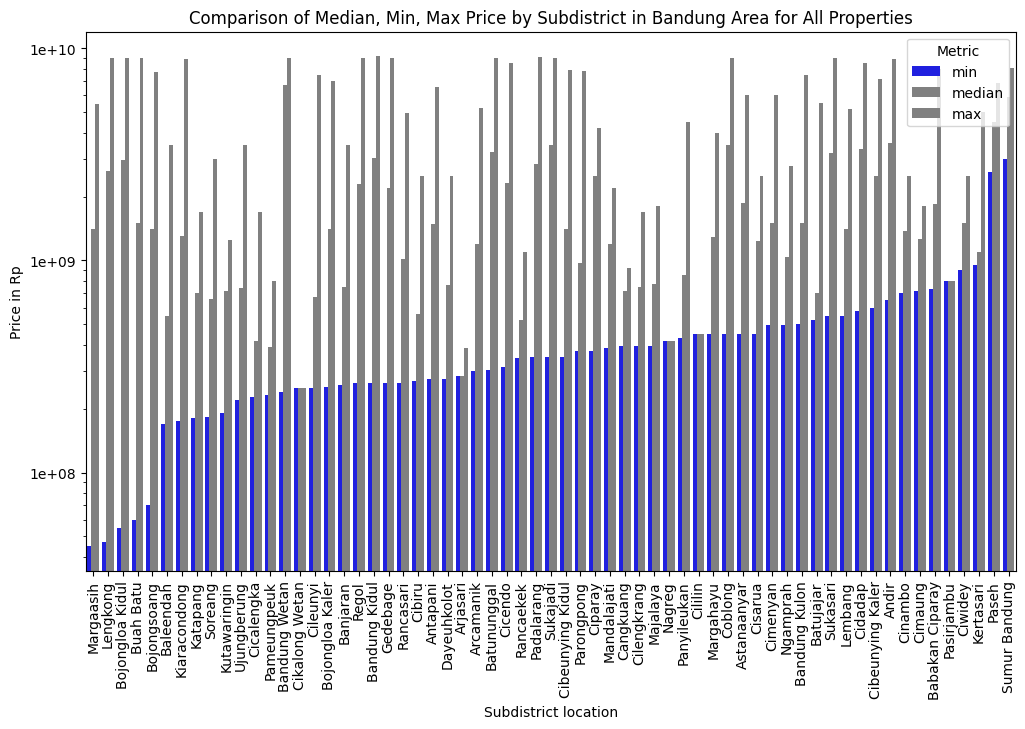

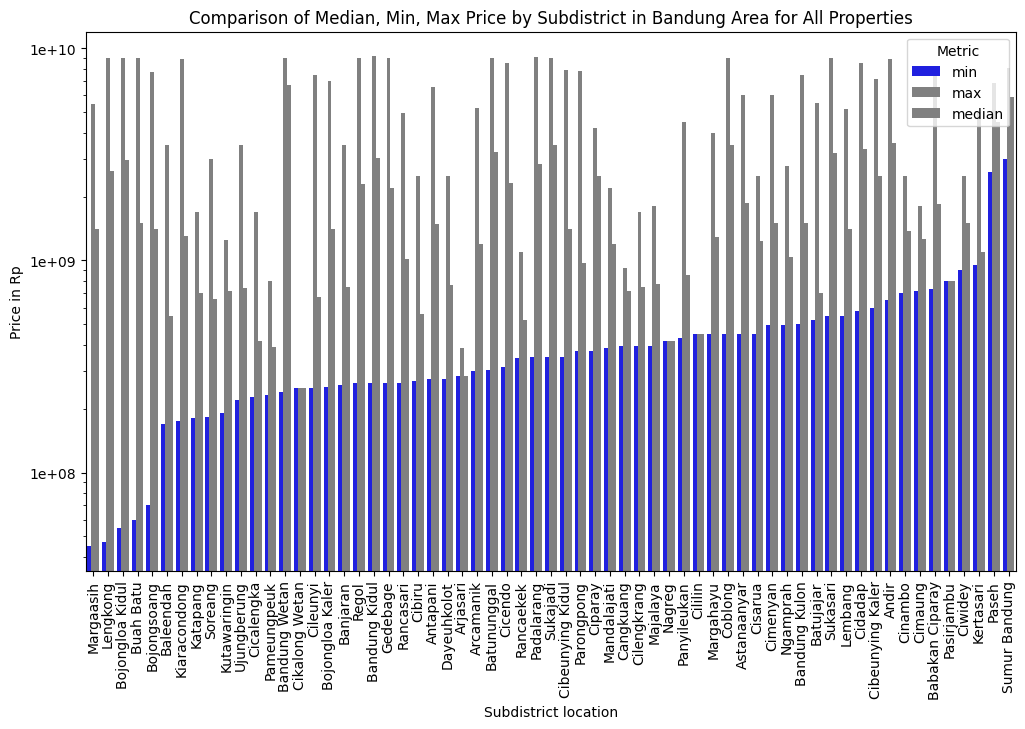

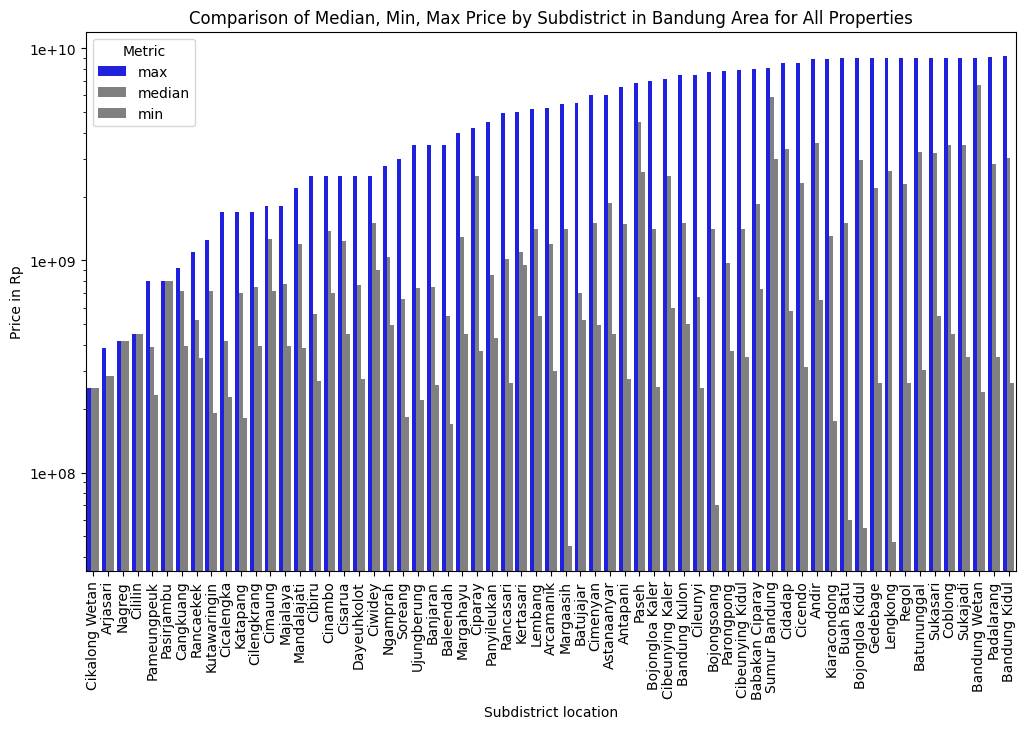

In [41]:
parameter = [(["Sort_Priority", "Value"], [True, True]), (["Value", "Metric"], [True, True]), (["Metric", "Value"], [True, True])]

for col, boolean in parameter:
    plt.figure(figsize=(12, 7))
    df_location_melted = df_location_melted.sort_values(col, ascending=boolean)
    sns.barplot(
        x="Location",
        y="Value",
        hue="Metric", 
        data=df_location_melted, 
        palette=["blue", "gray", "gray"]
    )
    
    plt.yscale('log')
    y_locator = ticker.LogLocator(base=10.0)
    y_formatter = ticker.LogFormatter(base=10.0)
    plt.gca().yaxis.set_major_locator(y_locator)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.title("Comparison of Median, Min, Max Price by Subdistrict in Bandung Area for All Properties")
    plt.xlabel("Subdistrict location")
    plt.ylabel("Price in Rp")
    plt.xticks(rotation=90) 
    plt.legend(title="Metric") 
    plt.show()

berdasarkan graph diatas. bisa terlihat bahwa per 24 agustus dataframe df_location

1. harga median rumah terendah berada di cikalong wetan kecamatan, sementara median tertinggi berada di sumur, bandung
2. minimum terendah berada di margaasih dan minimum tertinggi berada di sumur, bandung
3. maksimal terendah berada di cikalong wetan, dan maksimal tertinggi berada di bandung kidul

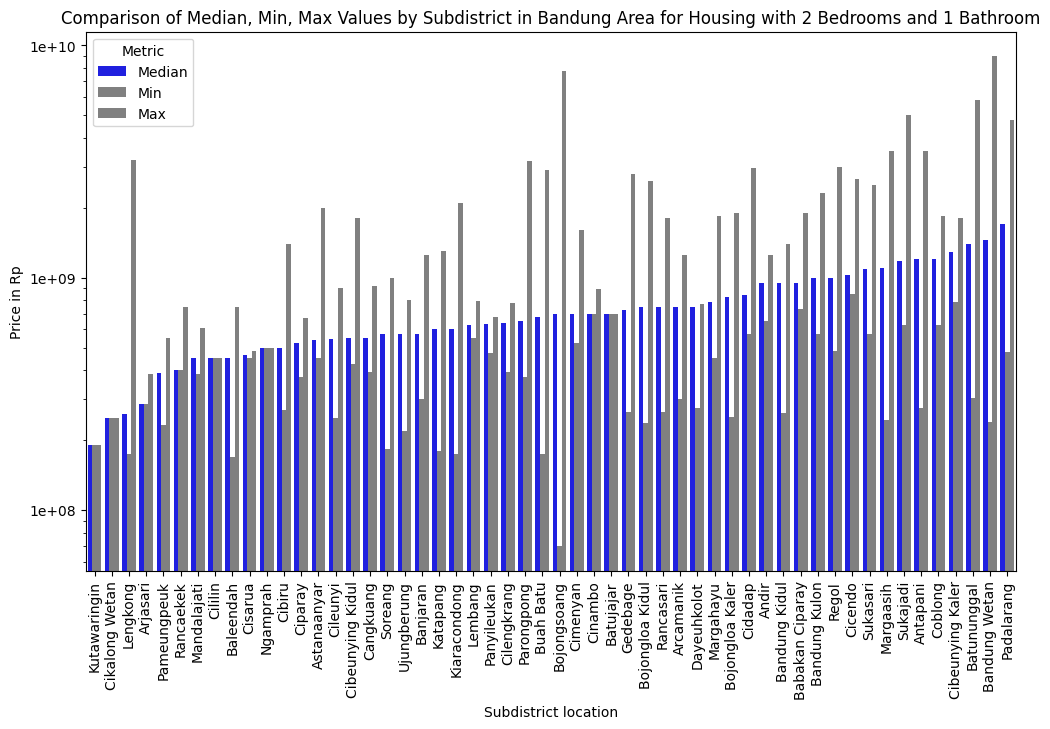

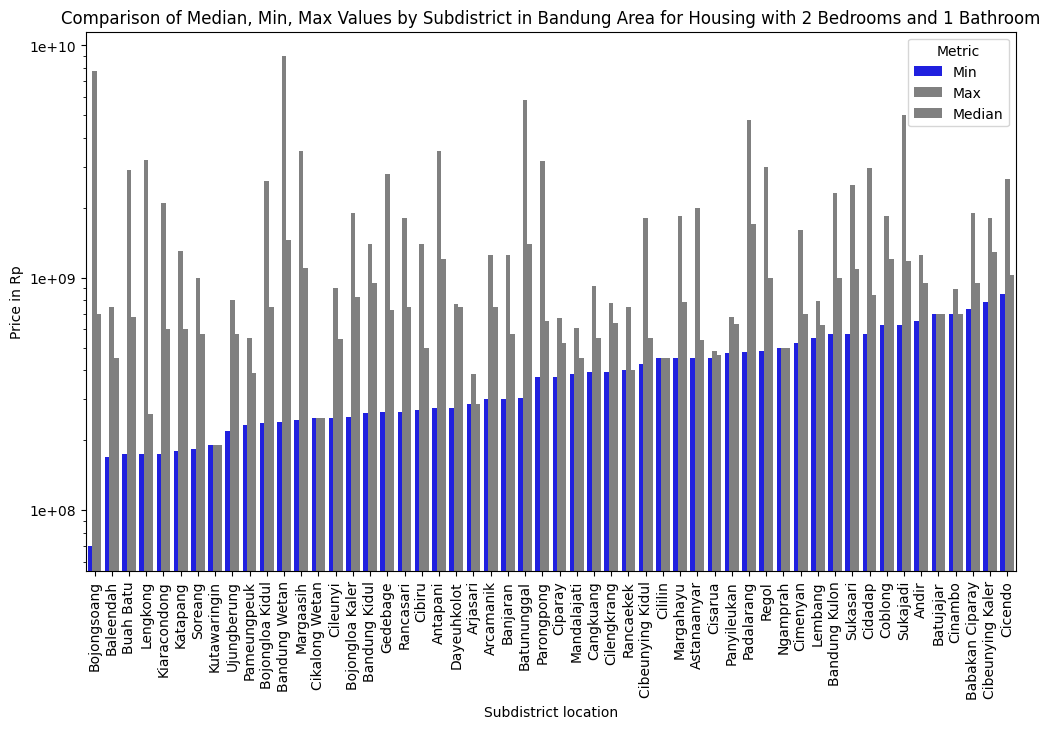

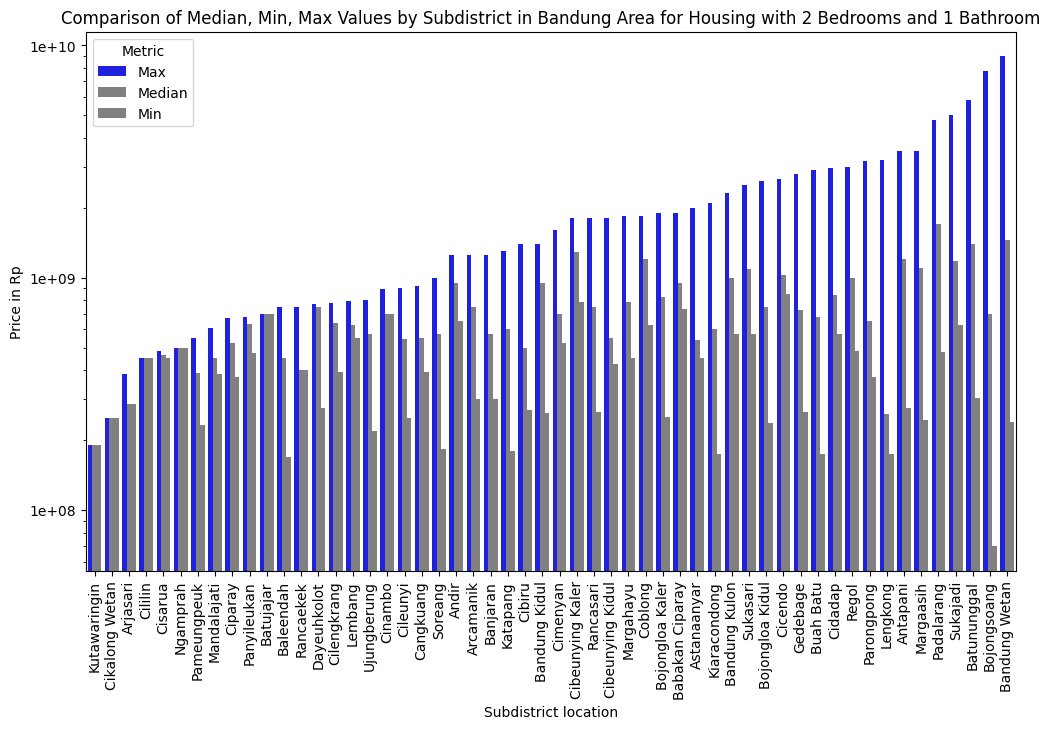

In [42]:
orting_order = {"Min": 1, "Median": 0, "Max": 2}
df_2b1t_melted = df_2b1t.melt(id_vars="Location", var_name="Metric", value_name="Value")
df_2b1t_melted["Sort_Priority"] = df_2b1t_melted["Metric"].map(sorting_order)

parameter = [(["Sort_Priority", "Value"], [True, True]), (["Value", "Metric"], [True, True]), (["Metric", "Value"], [True, True])]

for col, boolean in parameter:
    plt.figure(figsize=(12, 7))
    df_2b1t_melted = df_2b1t_melted.sort_values(col, ascending=boolean)
    sns.barplot(
        x="Location",
        y="Value",
        hue="Metric", 
        data=df_2b1t_melted, 
        palette=["blue", "grey", "grey"]
    )
    
    plt.yscale('log')
    y_locator = ticker.LogLocator(base=10.0)
    y_formatter = ticker.LogFormatter(base=10.0)
    plt.gca().yaxis.set_major_locator(y_locator)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.title("Comparison of Median, Min, Max Values by Subdistrict in Bandung Area for Housing with 2 Bedrooms and 1 Bathroom")
    plt.xlabel("Subdistrict location")
    plt.ylabel("Price in Rp")
    plt.xticks(rotation=90) 
    plt.legend(title="Metric") 
    plt.show()

berasarkan graph dataset rumah yang memiliki 2 kamartidur dan 1 kamar mandi
1. median terendah ada di katawaringin dan median tertinggi di padalarang
2. minimum terendah di bojongsoan dan minimum tertinggi di cicendo
3. maksimum terendah di kutawaringin dan maksimum tertinggi di bnadung wetan

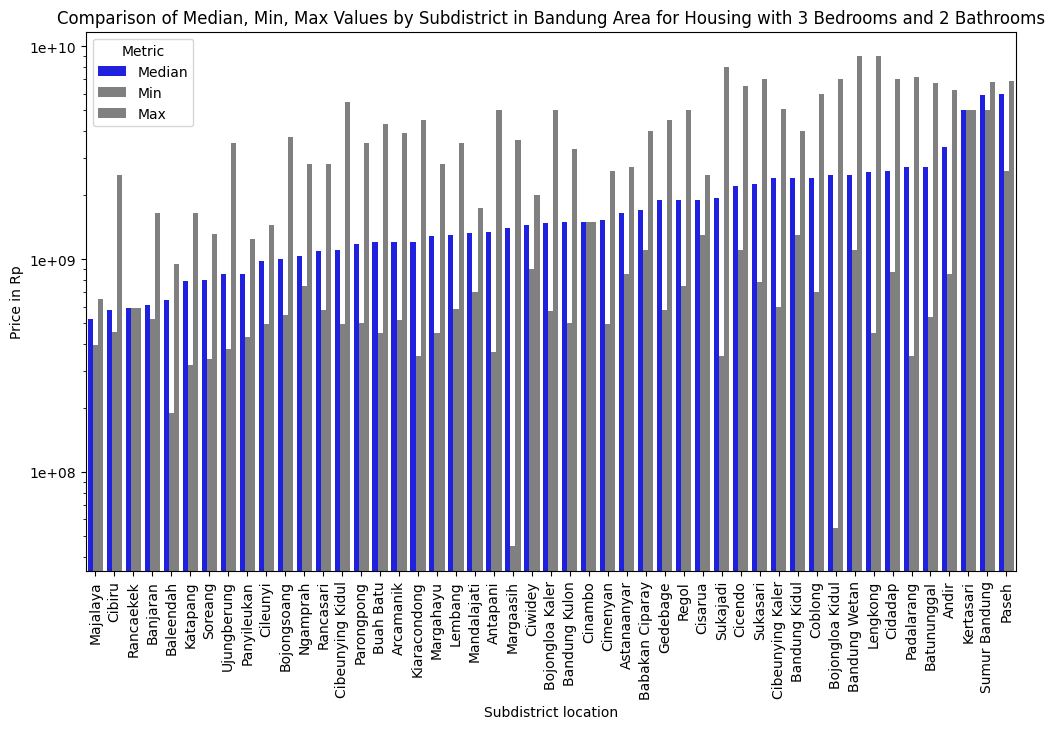

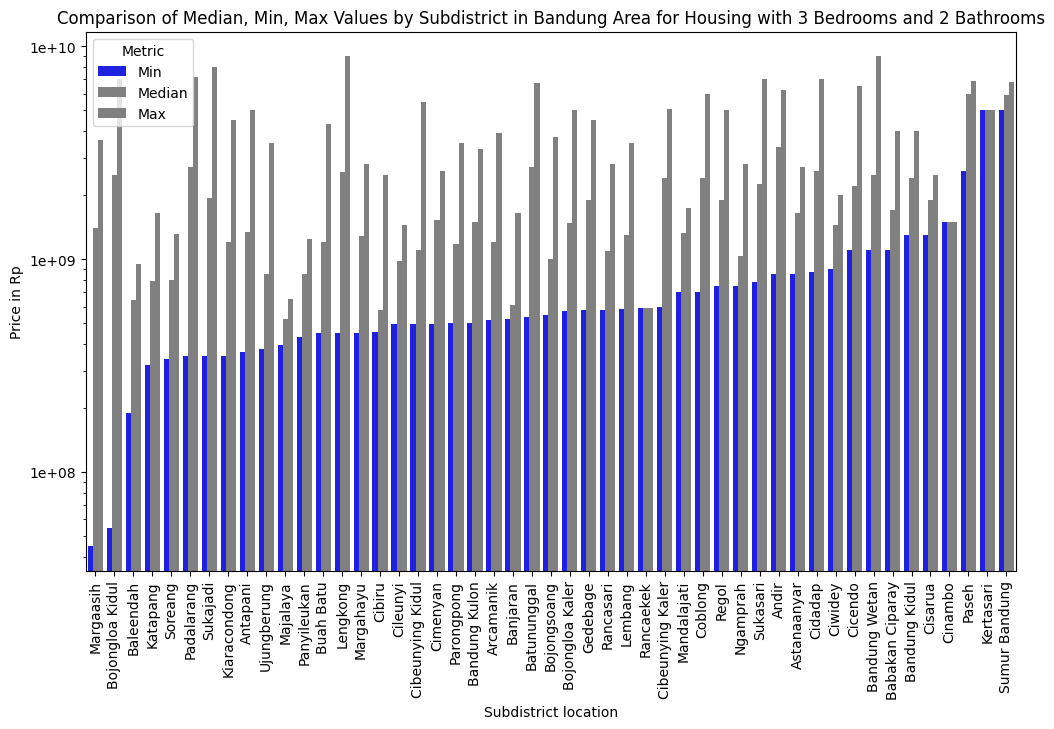

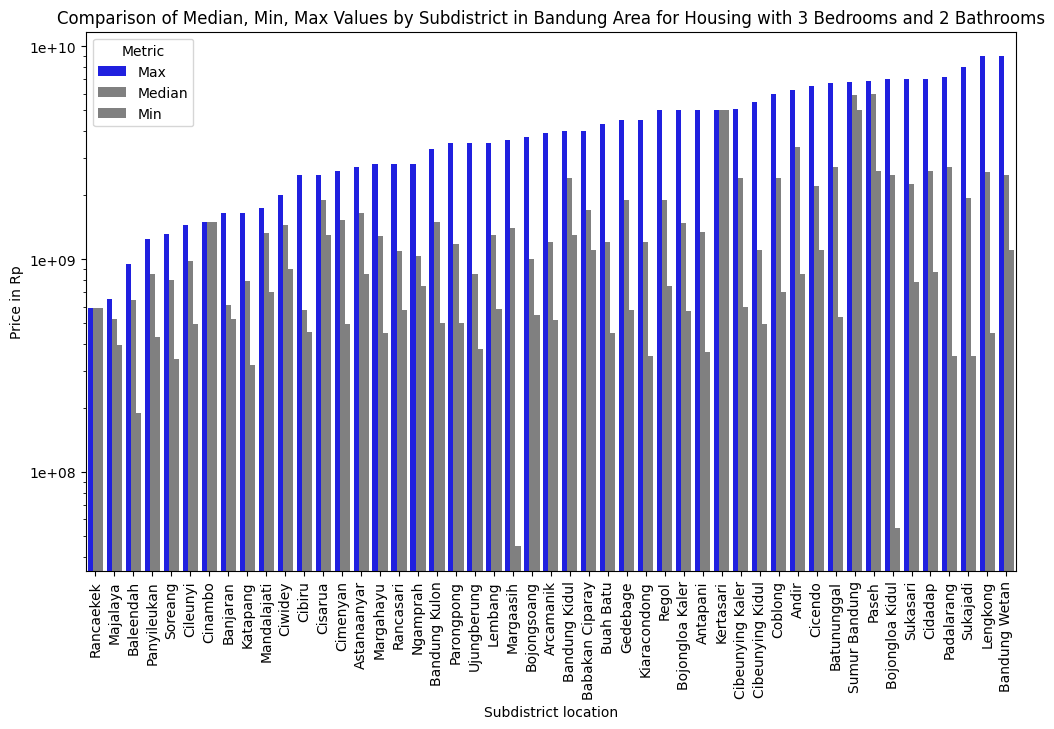

In [43]:
sorting_order = {"Min": 1, "Median": 0, "Max": 2}
df_3b2t_melted = df_3b2t.melt(id_vars="Location", var_name="Metric", value_name="Value")
df_3b2t_melted["Sort_Priority"] = df_3b2t_melted["Metric"].map(sorting_order)

parameter = [(["Sort_Priority", "Value"], [True, True]), (["Value", "Metric"], [True, True]), (["Metric", "Value"], [True, True])]

for col, boolean in parameter:
    plt.figure(figsize=(12, 7))
    df_3b2t_melted = df_3b2t_melted.sort_values(col, ascending=boolean)
    sns.barplot(
        x="Location",
        y="Value",
        hue="Metric", 
        data=df_3b2t_melted, 
        palette=["blue", "gray", "gray"]
    )
    
    plt.yscale('log')
    y_locator = ticker.LogLocator(base=10.0)
    y_formatter = ticker.LogFormatter(base=10.0)
    plt.gca().yaxis.set_major_locator(y_locator)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.title("Comparison of Median, Min, Max Values by Subdistrict in Bandung Area for Housing with 3 Bedrooms and 2 Bathrooms")
    plt.xlabel("Subdistrict location")
    plt.ylabel("Price in Rp")
    plt.xticks(rotation=90) 
    plt.legend(title="Metric") 
    plt.show()

bersarkan graph diatas, dengan dataset rumah dengan 3 kamartidur dan 2 kamarmandi
1. median terendah berada di majalaya dan median tertinggi di paseh
2. minimum terendah di margaasih dan minimum tertinggi berada di sumur
3. maksimum terendah berada di racaekek dan maksimum tertinggi berada di bandung wetan
